In [ ]:
pip install -U 'git+https://github.com/leimao/cocoapi.git#subdirectory=PythonAPI'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/leimao/cocoapi.git to /tmp/pip-req-build-vzzt213u
  Running command git clone -q https://github.com/leimao/cocoapi.git /tmp/pip-req-build-vzzt213u
  Created wheel for pycocotools: filename=pycocotools-2.0-cp38-cp38-linux_x86_64.whl size=304482 sha256=51f658784cdb235d8156dc484664acd70e88fcf594c66cfa459af07886517279
  Stored in directory: /tmp/pip-ephem-wheel-cache-w7jaug2x/wheels/bf/78/f1/9a856d069f2c6b383df93dcbb04cff9aca00ac2beeefbded5b
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.6
    Uninstalling pycocotools-2.0.6:
      Successfully uninstalled pycocotools-2.0.6


In [ ]:
import random
from pycocotools.coco import COCO
import skimage.io as io
import random
import os
import cv2
import json
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from random import randint
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/MyDrive/Labeled data")

In [ ]:
import json
dataDir = "/content/drive/MyDrive/Labeled data/" 
 
train = "annotations/instances_train.json"  
test = "annotations/instances_test.json"
val = "annotations/instances_val.json"
coco_train = COCO(train)
coco_test = COCO(test)
coco_val = COCO(val)

loading annotations into memory...
Done (t=1.36s)
creating index...
index created!
loading annotations into memory...
Done (t=0.55s)
creating index...
index created!
loading annotations into memory...
Done (t=0.23s)
creating index...
index created!


## **Exploration of DataSet**

In [ ]:
#loading images
im_ids = coco_train.getImgIds()
choices = [im_ids[randint(0, len(im_ids))] for _ in range(1,4)]
images = [coco_train.loadImgs(choice)[0] for choice in choices]
def generate_imgs():
  return images

In [ ]:
def plot_images(images):
  fig = plt.figure(figsize=(10, 70))

  for i, image in enumerate(images):
    image_name = os.path.join( dataDir + 'images/train', image['file_name'])
    I = plt.imread(image_name)
    fig.add_subplot(1, 3, i + 1)
    plt.axis('off')
    plt.imshow(I)
    plt.title(f'Image {i + 1}')
  plt.show()
  

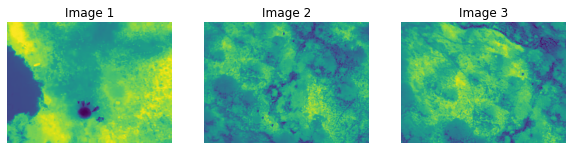

In [ ]:

images = generate_imgs()
plot_images(images)

In [ ]:
# Get the annotations for one of the above images. 
ann_ids = coco_train.getAnnIds(imgIds=[(choices[0])], iscrowd=None)
anns = coco_train.loadAnns(ann_ids)
print(f"Annotations for Image ID {choices}:")
print(anns)

Annotations for Image ID [11238, 28452, 28487]:
[{'id': 9743, 'image_id': 11238, 'category_id': 1, 'segmentation': [], 'area': 836.352000000001, 'bbox': [328.86999999999995, 324.72, 31.680000000000064, 26.399999999999977], 'iscrowd': 0, 'attributes': {'occluded': False, 'track_id': 0, 'keyframe': True}}, {'id': 9744, 'image_id': 11238, 'category_id': 1, 'segmentation': [], 'area': 739.9563999999988, 'bbox': [345.26, 366.25, 32.43999999999994, 22.810000000000002], 'iscrowd': 0, 'attributes': {'occluded': False, 'track_id': 1, 'keyframe': True}}]


In [ ]:
#number of superCategories
cat_id1 = coco_train.getCatIds()
cat_id2 = coco_test.getCatIds()
cat_id3 = coco_val.getCatIds()

cat1 = coco_train.loadCats(cat_id1)
cat2 = coco_test.loadCats(cat_id2)
cat3 = coco_val.loadCats(cat_id3)
Train_SuperCategories = list(set([cat['supercategory'] for cat in cat1]))
Test_SuperCategories = list(set([cat['supercategory'] for cat in cat2]))
Val_SuperCategories = list(set([cat['supercategory'] for cat in cat3]))

#print("Number of super categories in TrainSet: ", len(Train_SuperCategories))
print("List of super categories in TrainSet: ", Train_SuperCategories)
print("List of super categories in TrainSet: ", Test_SuperCategories)
print("List of super categories in TrainSet: ", Val_SuperCategories)

List of super categories in TrainSet:  ['']
List of super categories in TrainSet:  ['']
List of super categories in TrainSet:  ['']


In [ ]:
# Number of Categories in each train set and the Category IDs.

print(f"Number of train_Categories: {len(cat_id1)}"); print(cat_id1)
print(f"Number of test_Categories: {len(cat_id2)}") ; print(cat_id2)
print(f"Number of val_Categories: {len(cat_id3)}") ; print(cat_id3)

Number of train_Categories: 1
[1]
Number of test_Categories: 3
[1, 2, 3]
Number of val_Categories: 1
[1]


In [ ]:
# Print categories.
category_names_train = [cat["name"] for cat in cat1]
category_names_test = [cat["name"] for cat in cat2]
category_names_val = [cat["name"] for cat in cat3]
print("List of Train_Set categories: ", category_names_train)
print("List of Test_Set categories: ", category_names_test)
print("List of Val_set_Set categories: ", category_names_val)

List of Train_Set categories:  ['Human']
List of Test_Set categories:  ['Human', 'Rock', 'Animal']
List of Val_set_Set categories:  ['Human']


In [ ]:
#all categories and ids
print(cat1)
print(cat2)
print(cat3)

[{'id': 1, 'name': 'Human', 'supercategory': ''}]
[{'id': 1, 'name': 'Human', 'supercategory': ''}, {'id': 2, 'name': 'Rock', 'supercategory': ''}, {'id': 3, 'name': 'Animal', 'supercategory': ''}]
[{'id': 1, 'name': 'Human', 'supercategory': ''}]


In [39]:
#images in train dataset by category
category_imageIds = dict()   #re-do for teest and eval

for i in range(0,len(cat_id1)):
    imgIds = coco_train.getImgIds(catIds=cat_id1[i])
    img = []
    for j in imgIds: 
        img.append(j)
    category_imageIds[category_names_train[i]] = img
    
print("categories with Image IDs :",len(category_imageIds))
length_dict = {key: len(value) for key, value in category_imageIds.items()}
print("Total images in each sub categories: ", length_dict)

categories with Image IDs : 1
Total images in each sub categories:  {'Human': 13111}


In [40]:
#images in test dataset by category
for i in range(0,len(cat_id2)):
    imgIds = coco_test.getImgIds(catIds=cat_id2[i])
    img = []
    for j in imgIds: 
        img.append(j)
    category_imageIds[category_names_test[i]] = img
    
print("categories with Image IDs :",len(category_imageIds))
length_dict = {key: len(value) for key, value in category_imageIds.items()}
print("Total images in each categories: ", length_dict)

categories with Image IDs : 3
Total images in each sub categories:  {'Human': 1900, 'Rock': 0, 'Animal': 0}


In [44]:
#images in val dataset by category
for i in range(0,len(cat_id3)):
    imgIds = coco_val.getImgIds(catIds=cat_id3[i])
    img = []
    for j in imgIds: 
        img.append(j)
    category_imageIds[category_names_val[i]] = img
    
print("categories with Image IDs :",len(category_imageIds))
length_dict = {key: len(value) for key, value in category_imageIds.items()}
print("Total images in each categories: ", length_dict)

categories with Image IDs : 3
Total images in each categories:  {'Human': 3278, 'Rock': 0, 'Animal': 0}


In [ ]:
# print image by id.
query_id = cat_id2[0]
query_annotation = cat2[0]            #coco_test.loadCats([query_id])
query_name = query_annotation["name"]
query_supercategory = query_annotation["supercategory"]
print(
        f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
    )

Category ID: 1, Category Name: Human, Supercategory: 


[{'id': 2, 'image_id': 124, 'category_id': 1, 'segmentation': [], 'area': 37.557999999999424, 'bbox': [317.53, 1.16, 4.449999999999932, 8.44], 'iscrowd': 0, 'attributes': {'occluded': False, 'track_id': 0, 'keyframe': False}}]
[{'id': 2, 'image_id': 124, 'category_id': 1, 'segmentation': [], 'area': 37.557999999999424, 'bbox': [317.53, 1.16, 4.449999999999932, 8.44], 'iscrowd': 0, 'attributes': {'occluded': False, 'track_id': 0, 'keyframe': False}}]
[{'id': 2, 'image_id': 124, 'category_id': 1, 'segmentation': [], 'area': 37.557999999999424, 'bbox': [317.53, 1.16, 4.449999999999932, 8.44], 'iscrowd': 0, 'attributes': {'occluded': False, 'track_id': 0, 'keyframe': False}}]


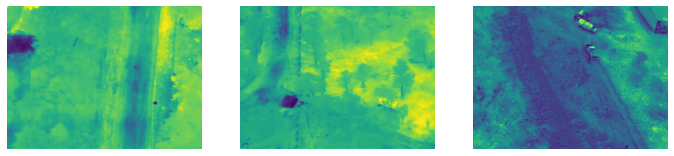

In [37]:
#random images with segmented objects inside them
fig = plt.gcf()
fig.set_size_inches(16, 16)
import numpy as np

catIds = coco_train.getCatIds(catNms=['Human'])
imgIds = coco_train.getImgIds(catIds=catIds );
imgIds = coco_train.getImgIds(imgIds = imgIds[0])
img = coco_train.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

for i, image in enumerate(images):#(next_pix[0:12]):
    
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')

    image_name = os.path.join( dataDir + 'images/train', image['file_name'])
    I = plt.imread(image_name)
    plt.imshow(I)
    annIds = coco_train.getAnnIds(imgIds=img['id'], catIds=(cat_id1), iscrowd=None)
    anns = coco_train.loadAnns(annIds)
    print(anns)
    coco_train.showAnns(anns)